In [1]:
import os
import pandas as pd

In [11]:
base_path = ".\\result"
directories = [dire for dire in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, dire))]
directories

['gbdt', 'lightgbm', 'nn', 'rf', 'xgboost']

In [12]:
perf_dile_pathes = []
for dire in directories:
    path = os.path.join(base_path, dire)
    files = [file for file in os.listdir(path) if "perf" in file]
    if files:
        perf_dile_pathes.append(os.path.join(path, files[0]))
perf_dile_pathes

['.\\result\\gbdt\\gbdt_performance_stats.csv',
 '.\\result\\lightgbm\\lightgbm_performance_stats.csv',
 '.\\result\\nn\\nn_performance_stats.csv',
 '.\\result\\rf\\rf_performance_stats.csv',
 '.\\result\\xgboost\\xgboost_performance_stats.csv']

In [20]:
all_perf_df = pd.DataFrame()
for perf_dile_path in perf_dile_pathes:
    df = pd.read_csv(perf_dile_path, index_col=0)
    model_name = perf_dile_path.split("\\")[2]
    col_names = [(model_name, item) for item in ["Mean", "Min", "Max"]]
    perf_df = pd.concat([df.mean(axis=1), df.min(axis=1), df.max(axis=1)], axis=1, keys=col_names)
    all_perf_df = pd.concat([all_perf_df, perf_df], axis=1)

all_perf_df = all_perf_df.dropna()
all_perf_df = all_perf_df.swaplevel(axis=1).sort_index(axis=1)
all_perf_df

Max                                              Mean  \
                gbdt  lightgbm        nn        rf   xgboost      gbdt   
accuracy    0.518462  0.517785  0.520241  0.517404  0.518825  0.510407   
precision   0.518123  0.516184  0.524507  0.515358  0.518038  0.509173   
recall      0.760114  0.750307  0.864106  0.686552  0.747731  0.503023   
f1          0.605192  0.601318  0.634641  0.583281  0.601599  0.500710   
roc_auc     0.517945  0.517679  0.527983  0.517028  0.518252  0.510356   
gini_index  0.035889  0.035358  0.055965  0.034057  0.036503  0.020713   

                                                         Min            \
            lightgbm        nn        rf   xgboost      gbdt  lightgbm   
accuracy    0.510485  0.509444  0.510304  0.510666  0.499747  0.498929   
precision   0.508983  0.509911  0.508606  0.509443  0.499296  0.498608   
recall      0.512194  0.517656  0.515631  0.501830  0.327637  0.363555   
f1          0.506132  0.488662  0.508568  0.499855  0.401429  0.425638   
roc_auc     0.510478  0.515378  0.510320  0.510626  0.499817  0.499014   
gini_index  0.020956  0.030756  0.020641  0.021252 -0.000367 -0.001971   

                                          
                  nn        rf   xgboost  
accuracy    0.502114  0.501296  0.501002  
precision   0.500948  0.500654  0.500417  
recall      0.151569  0.390059  0.322001  
f1          0.235177  0.442285  0.396181  
roc_auc     0.502514  0.501379  0.501060  
gini_index  0.005029  0.002758  0.002119

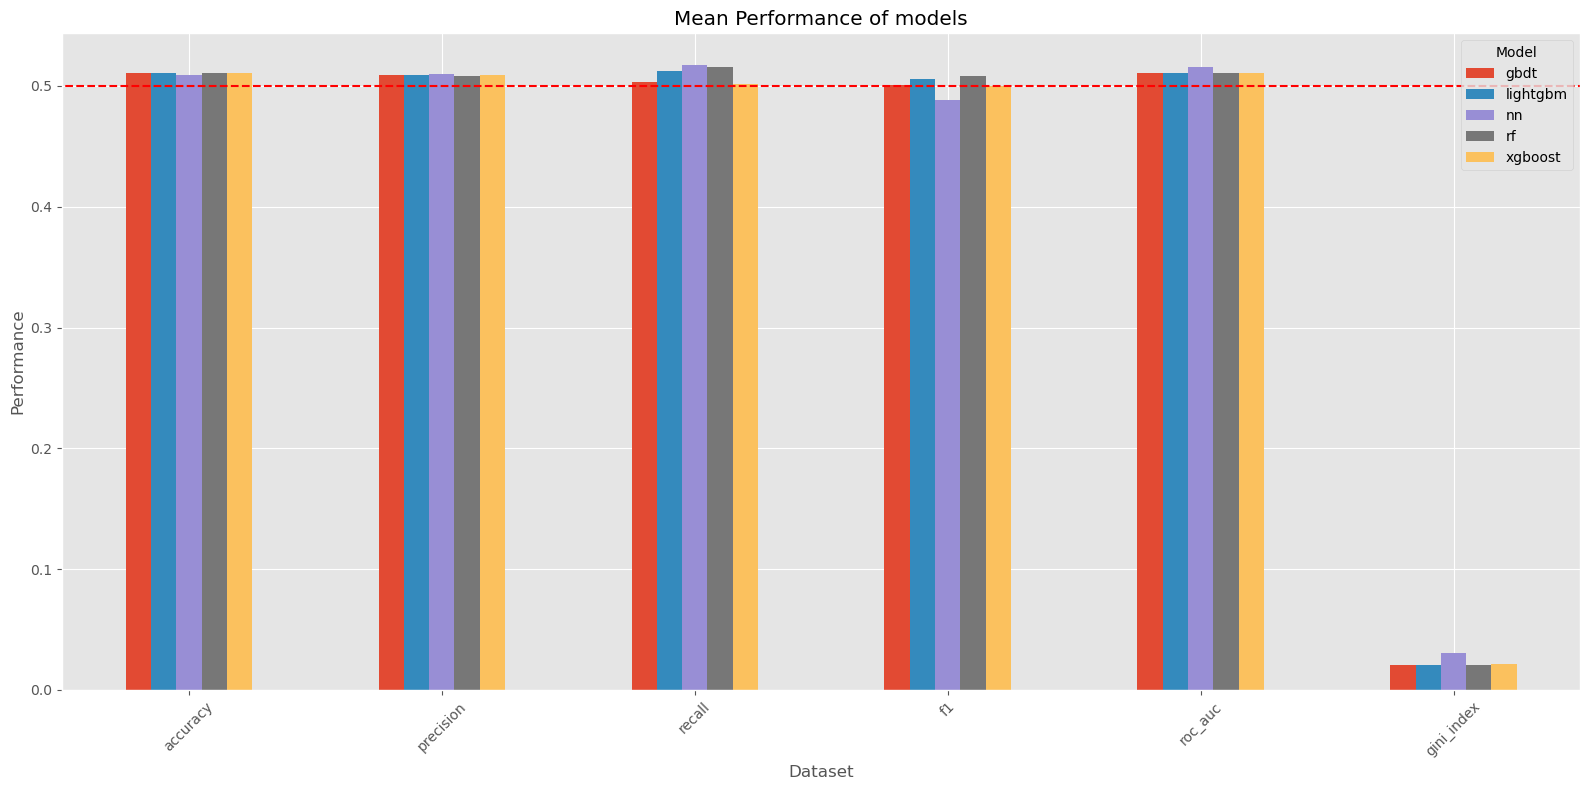

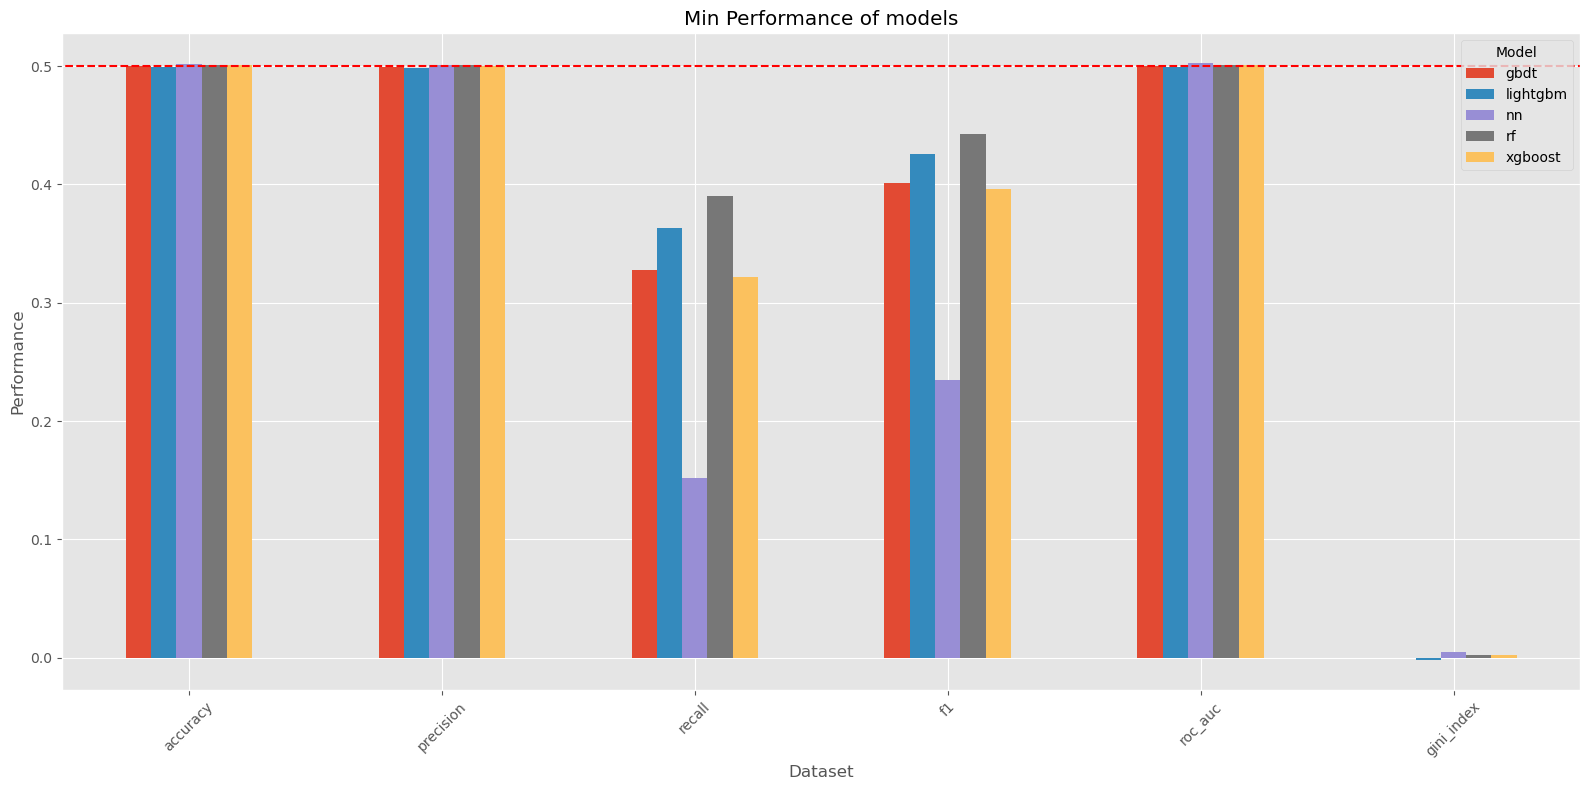

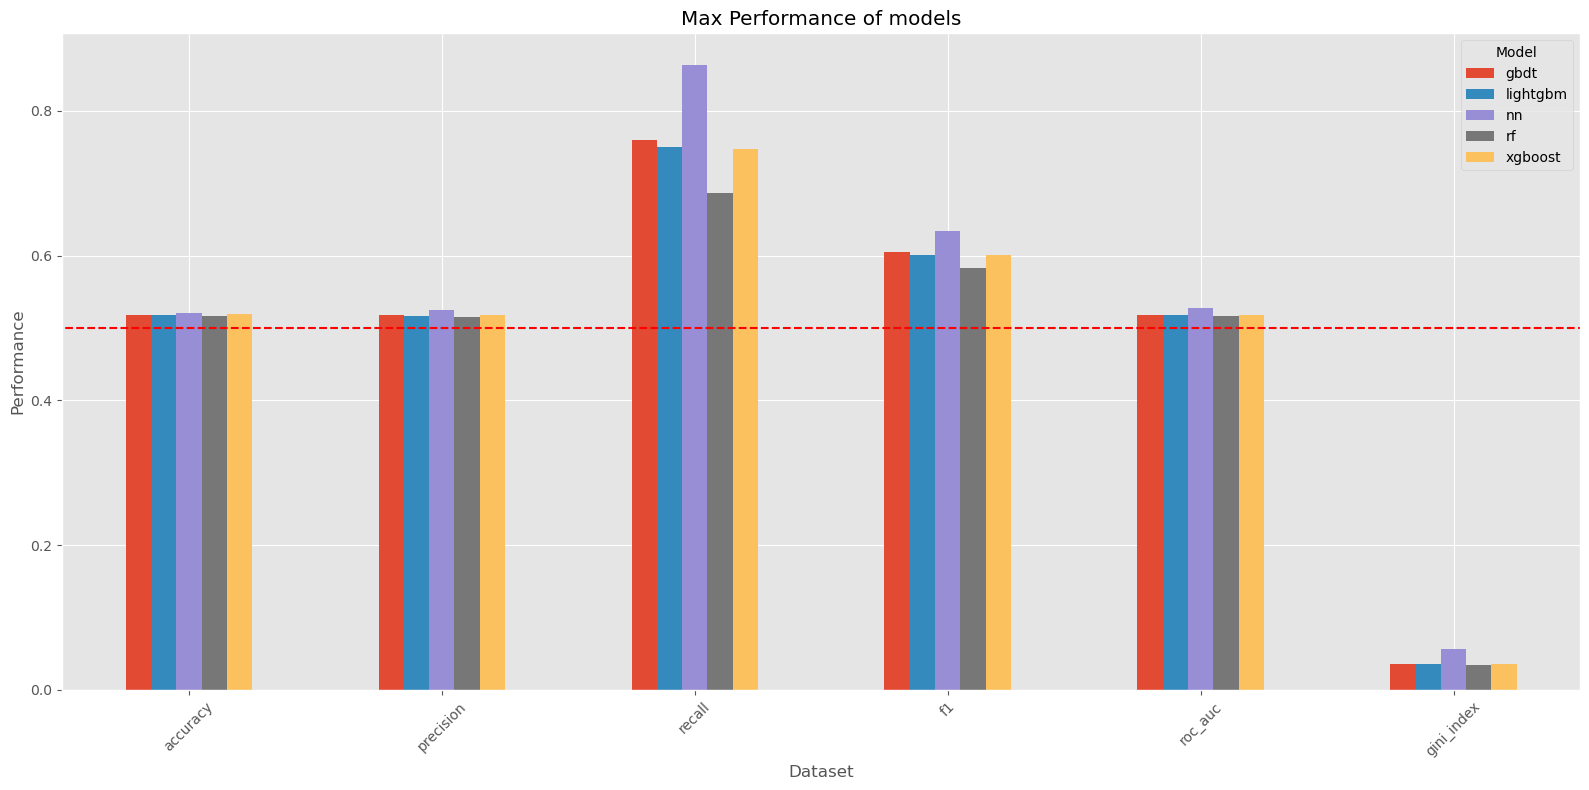

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for stats in ["Mean", "Min", "Max"]:
    # bar plot
    fig, ax = plt.subplots(figsize=(16, 8))
    all_perf_df[stats].plot(kind='bar', ax=ax)
    ax.hlines(y=0.5, xmin=-1, xmax=len(all_perf_df), color='r', linestyles='dashed')
    plt.title(f'{stats} Performance of models')
    plt.ylabel('Performance')
    plt.xlabel('Dataset')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.savefig(f'.\\result\\{stats}_performance.png')
    plt.show()